# EDA para Clasificación

__Cargar librerías__

In [1]:
import os
import sys
import getpass
import bz2
import pickle # Rick! 
from collections import Counter

import pandas as pd
import numpy as np
from scipy.io import loadmat
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.under_sampling import CondensedNearestNeighbour, NeighbourhoodCleaningRule, TomekLinks
from imblearn.over_sampling  import SMOTE

import socket

user = getpass.getuser()
hostname = socket.gethostname()

if hostname == "carlos-DesktopPC":
    os.chdir("/home/"+user+"/Documents/D/Niebla/")
else:
    os.chdir("/Users/"+user+"/Documents/D/Niebla/")


sys.path.append('src/aux/')
import aux_functions

__Cargar datos__

In [2]:
DATA_PATH = "./Data/Datos_A8/"

# Si no existe, crear el path para los nuevos datos
NEW_DATA_PATH = "./Data/Treated_Data/Classification/"
os.makedirs(NEW_DATA_PATH, exist_ok=True)

# Los datos a tratar son con el intervalo de tiempo de TIME_INTERVAL
TIME_INTERVAL = 30

#Fichero con los datos en 30 minutos
data = loadmat(DATA_PATH+"Visib_A8_Todas_"+str(TIME_INTERVAL)+".mat")["Visib_A8_Todas_"+str(TIME_INTERVAL)]

__Data Wrangling__

Convertir visibilidad en clases

In [3]:
"""
    Manipular datos para poder utilizarlos más facilmente
        * Hacer desplazamiento de la y
        * Poner los nombres a las columnas
        * Crear vector para clases
"""
data_ = data.copy()

# Hacer desplazamiento
vis = data[:,2]
#Quitar el primer valor de visibilidad
vis = vis[1:]
#Quitar el ultimo valor del dataset
data = data[:-1,:]

#Nombre de las columnas
cols = ["qpRa","sa","vs","hr","at","st","td","gr","ws","wd","ap"]

#Pasar a dataframe
df = pd.DataFrame(data, columns=cols)

#Guardar los datos de visibilidad desplazados en el dataset
df["y_t+1"] = vis

#Añadir columna de clase
classes = np.zeros(df["vs"].shape, dtype=np.int)

"""
    Organizar los valores de visibilidad en 5 clases
"""

#classes[(df["y_t+1"] < 40)] = 0
classes[((df["y_t+1"] >= 40) & (df["y_t+1"] < 200))] = 1
classes[((df["y_t+1"] >= 200) & (df["y_t+1"] < 1000))] = 2
classes[((df["y_t+1"] >= 1000) & (df["y_t+1"] < 2000))] = 3
classes[(df["y_t+1"] >= 2000)] = 4

#Insertar las clases en el DF
df["class"] = classes

Crear un dataset sin el desplazamiento para hacer la gráfica de la visibilidad con colores de clases

In [4]:
df_ = pd.DataFrame(data_, columns=cols)

classes_ = np.zeros(df_["vs"].shape, dtype=np.int32)
classes_[((df_["vs"] >= 40) & (df_["vs"] < 200))] = 1
classes_[((df_["vs"] >= 200) & (df_["vs"] < 1000))] = 2
classes_[((df_["vs"] >= 1000) & (df_["vs"] < 2000))] = 3
classes_[(df_["vs"] >= 2000)] = 4

df_["class"] = classes_

df_.to_csv(NEW_DATA_PATH+"OG_data_unmodified.csv", index=False)

# Distribución de los datos originales

__Correlación de las variables del dataset__

Code source: [1](https://stackoverflow.com/a/50703596), [2](https://likegeeks.com/python-correlation-matrix/)

In [8]:
corr = df.drop(["class", "y_t+1"], axis=1).corr().round(3)
corr.style.background_gradient(cmap='coolwarm').set_precision(3)
#sns.heatmap(corr, annot = True)
#plt.show()

,qpRa,sa,vs,hr,at,st,td,gr,ws,wd,ap
qpRa,1.000,-0.011,0.153,0.100,-0.219,-0.213,-0.167,-0.075,0.187,0.088,-0.383
sa,-0.011,1.000,0.034,-0.033,-0.166,-0.126,-0.179,-0.039,-0.011,-0.018,-0.008
vs,0.153,0.034,1.000,-0.427,-0.064,0.078,-0.271,0.301,0.149,-0.053,-0.138
hr,0.100,-0.033,-0.427,1.000,-0.272,-0.331,0.255,-0.417,0.063,0.067,-0.105
at,-0.219,-0.166,-0.064,-0.272,1.000,0.820,0.858,0.385,-0.198,-0.021,0.215
st,-0.213,-0.126,0.078,-0.331,0.820,1.000,0.655,0.786,-0.243,0.014,0.198
td,-0.167,-0.179,-0.271,0.255,0.858,0.655,1.000,0.179,-0.161,0.014,0.158
gr,-0.075,-0.039,0.301,-0.417,0.385,0.786,0.179,1.000,-0.083,0.008,0.072
ws,0.187,-0.011,0.149,0.063,-0.198,-0.243,-0.161,-0.083,1.000,-0.051,-0.379
wd,0.088,-0.018,-0.053,0.067,-0.021,0.014,0.014,0.008,-0.051,1.000,-0.009


Guardar la matriz de correlaciones en html, [source](https://stackoverflow.com/questions/43280979/is-it-possible-to-export-a-pandas-dataframe-styler-object-to-html/50526327)

In [9]:
with open("rendered_colored_corr_matrix.html", "w") as f:
    f.write(corr.style.background_gradient(cmap='coolwarm').set_precision(3).render())

__Distribución de las variables y outliers__

[Boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

<IPython.core.display.Javascript object>


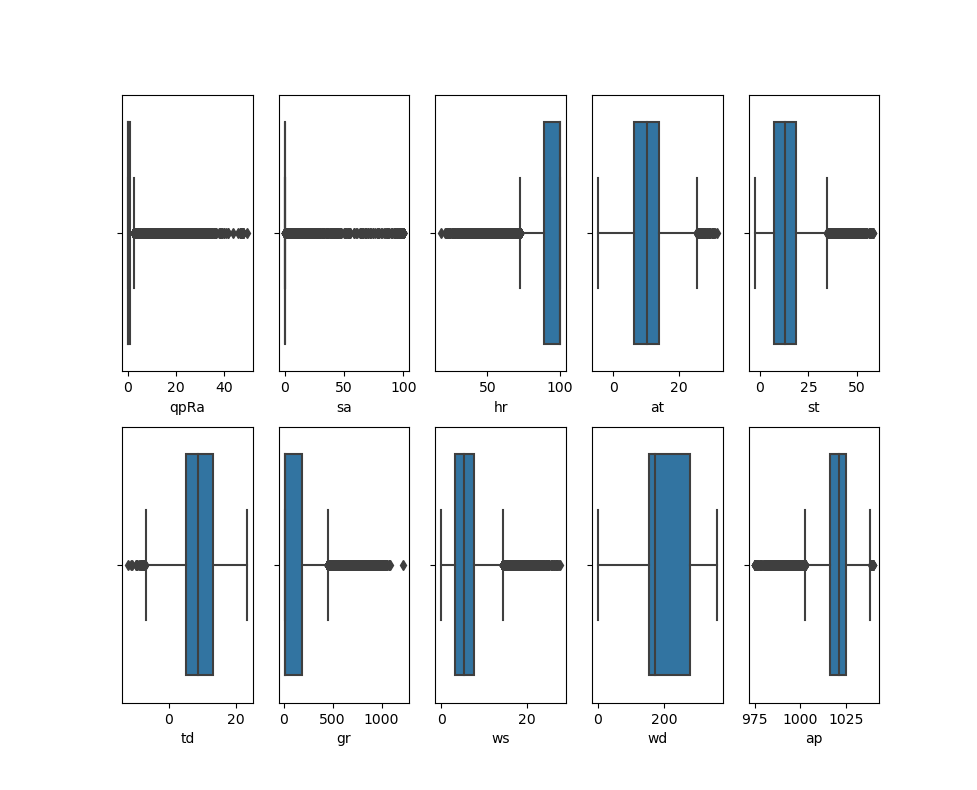

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  wa

In [10]:
%matplotlib notebook
plt.subplots(2,5)
for idx, nm in enumerate(df.drop(["vs","y_t+1","class"],axis=1)):
    plt.subplot(2,5,idx+1)
    sns.boxplot(df[nm], orient="v")
plt.show()

[Violin Plot](https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot)

<IPython.core.display.Javascript object>


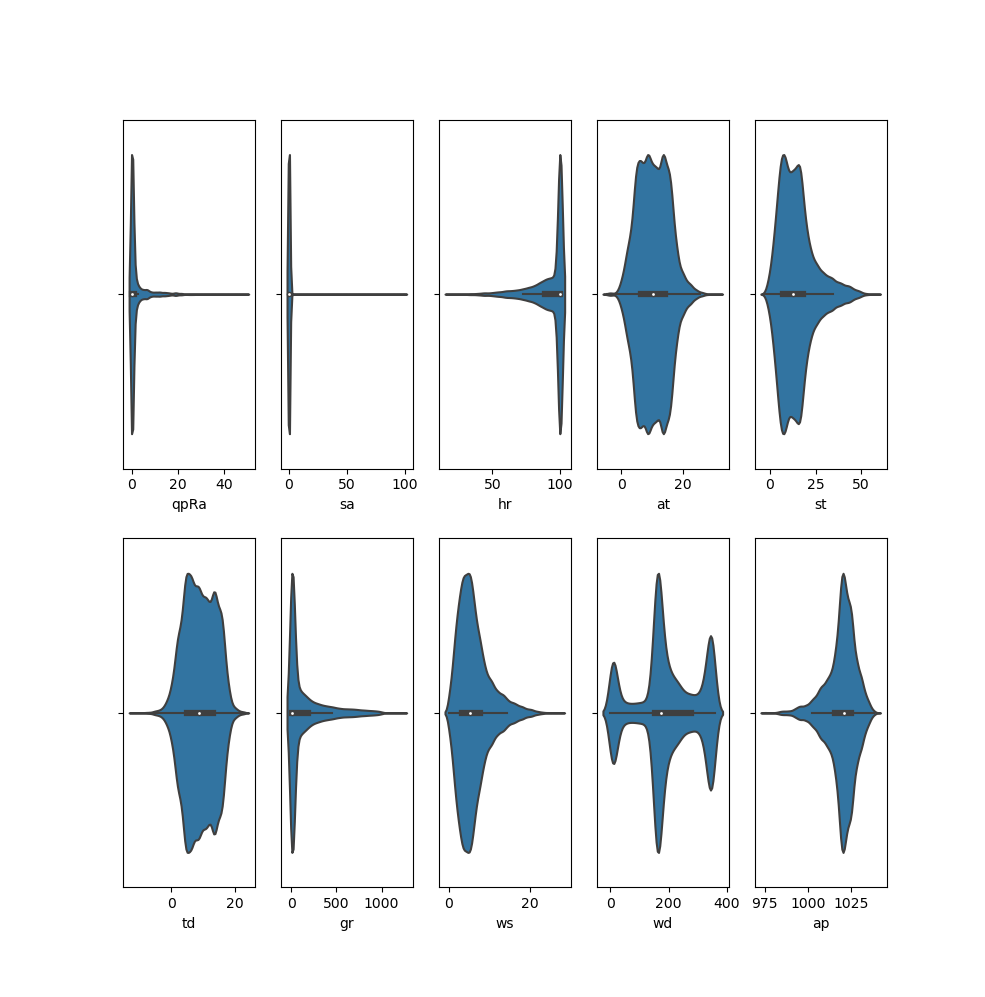

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/an

In [11]:
plt.subplots(2,5)
for idx, nm in enumerate(df.drop(["vs","y_t+1","class"],axis=1)):
    plt.subplot(2,5,idx+1)
    sns.violinplot(df[nm])#, orient="v")
plt.show()

[Violin Plot by Class](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

**TODO:** Intentar sacar esto para el paper

<IPython.core.display.Javascript object>


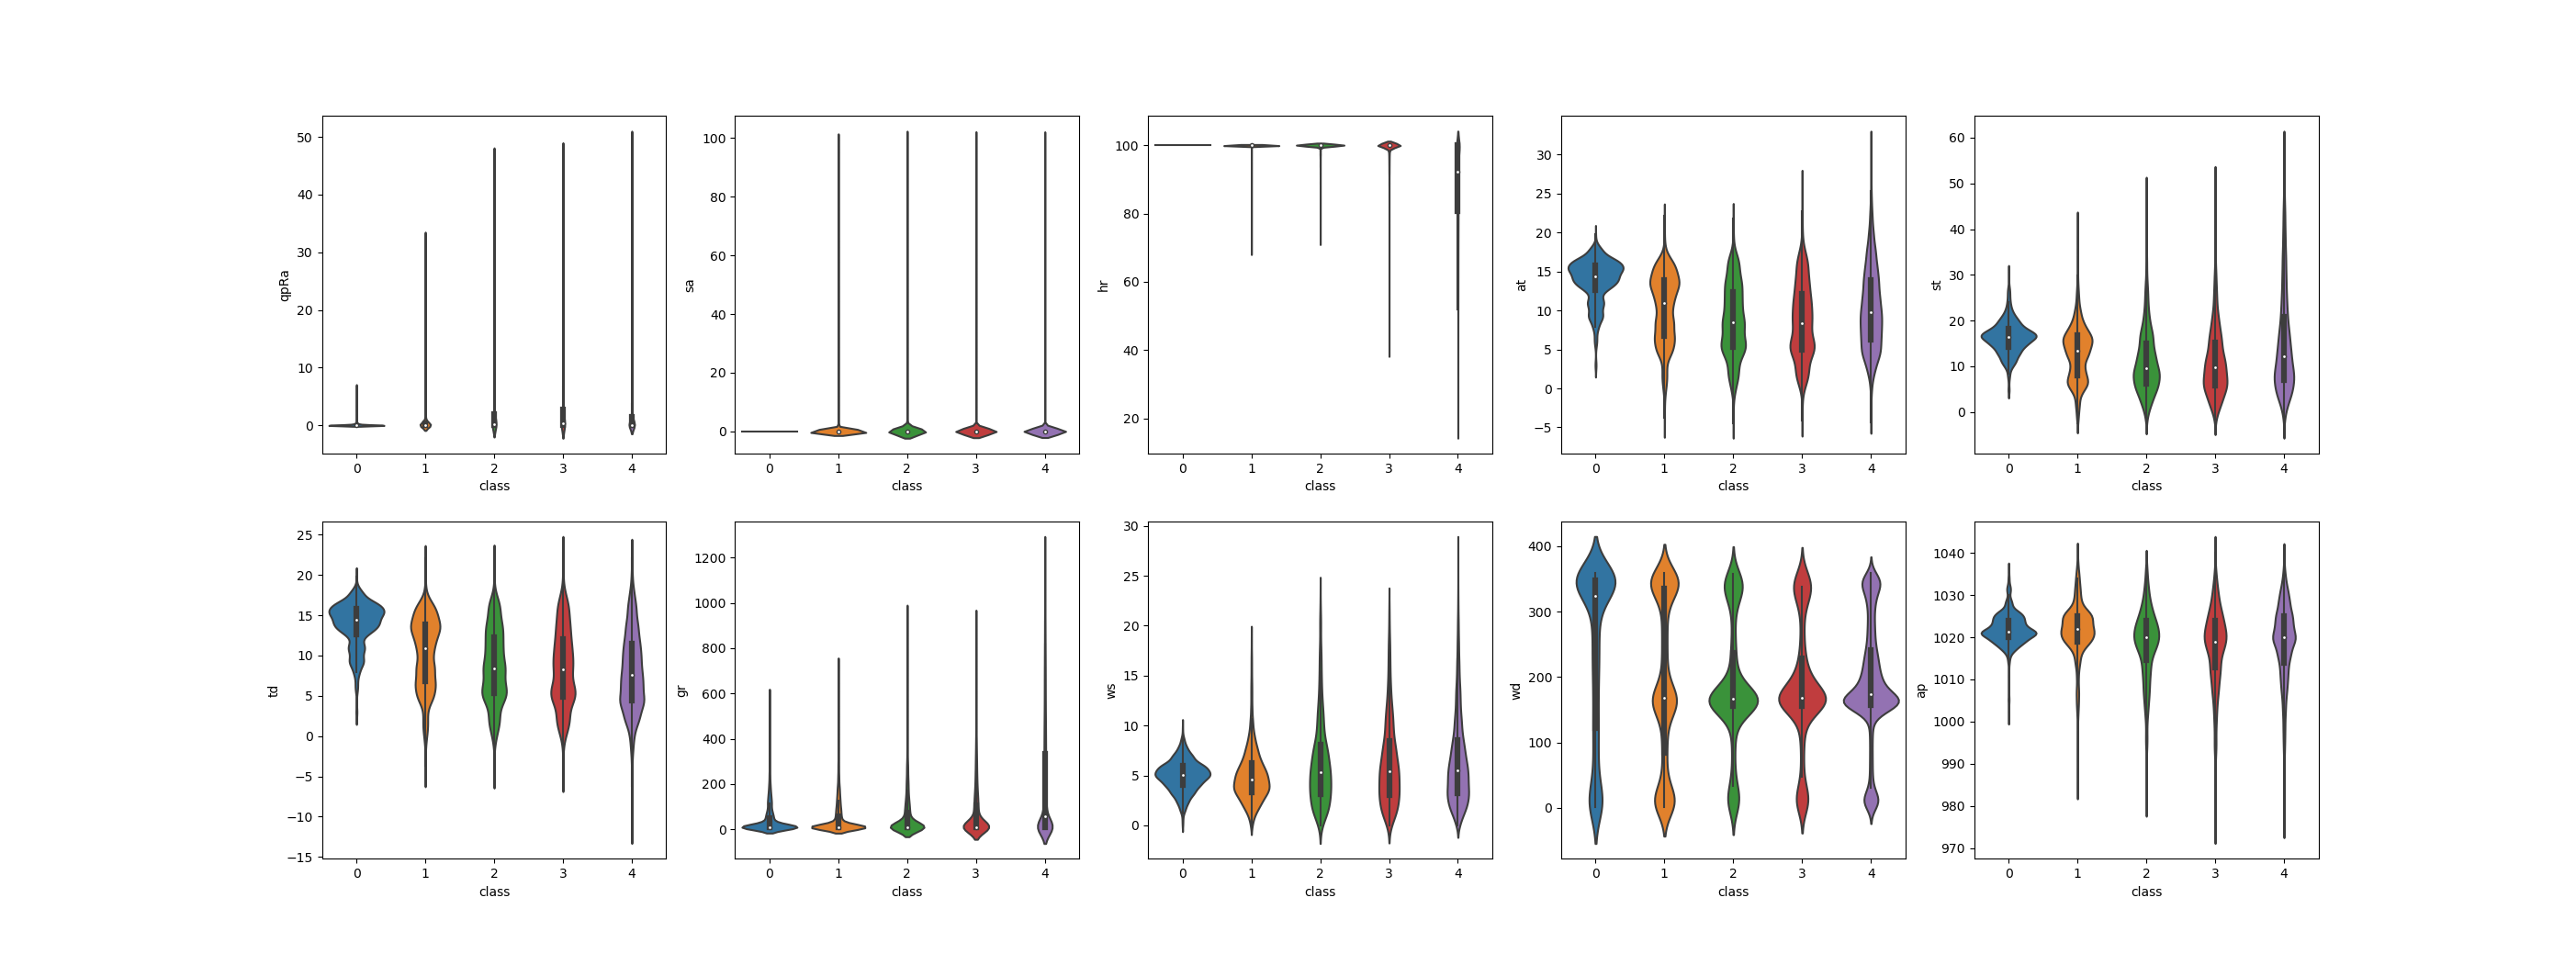

In [12]:
#%matplotlib inline
plt.subplots(2,5)
for idx, nm in enumerate(df.drop(["vs","y_t+1","class"],axis=1)):
    plt.subplot(2,5,idx+1)
    sns.violinplot(x=df["class"],y=df[nm]);
    
    
plt.savefig('violinplot_niebla.png', dpi=320)
plt.show()

[Boxplots aggregated by class](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html)

Este plot no tiene mucho sentido, habría que poner el rango y dependiente de la variable que se está ploteando

<IPython.core.display.Javascript object>


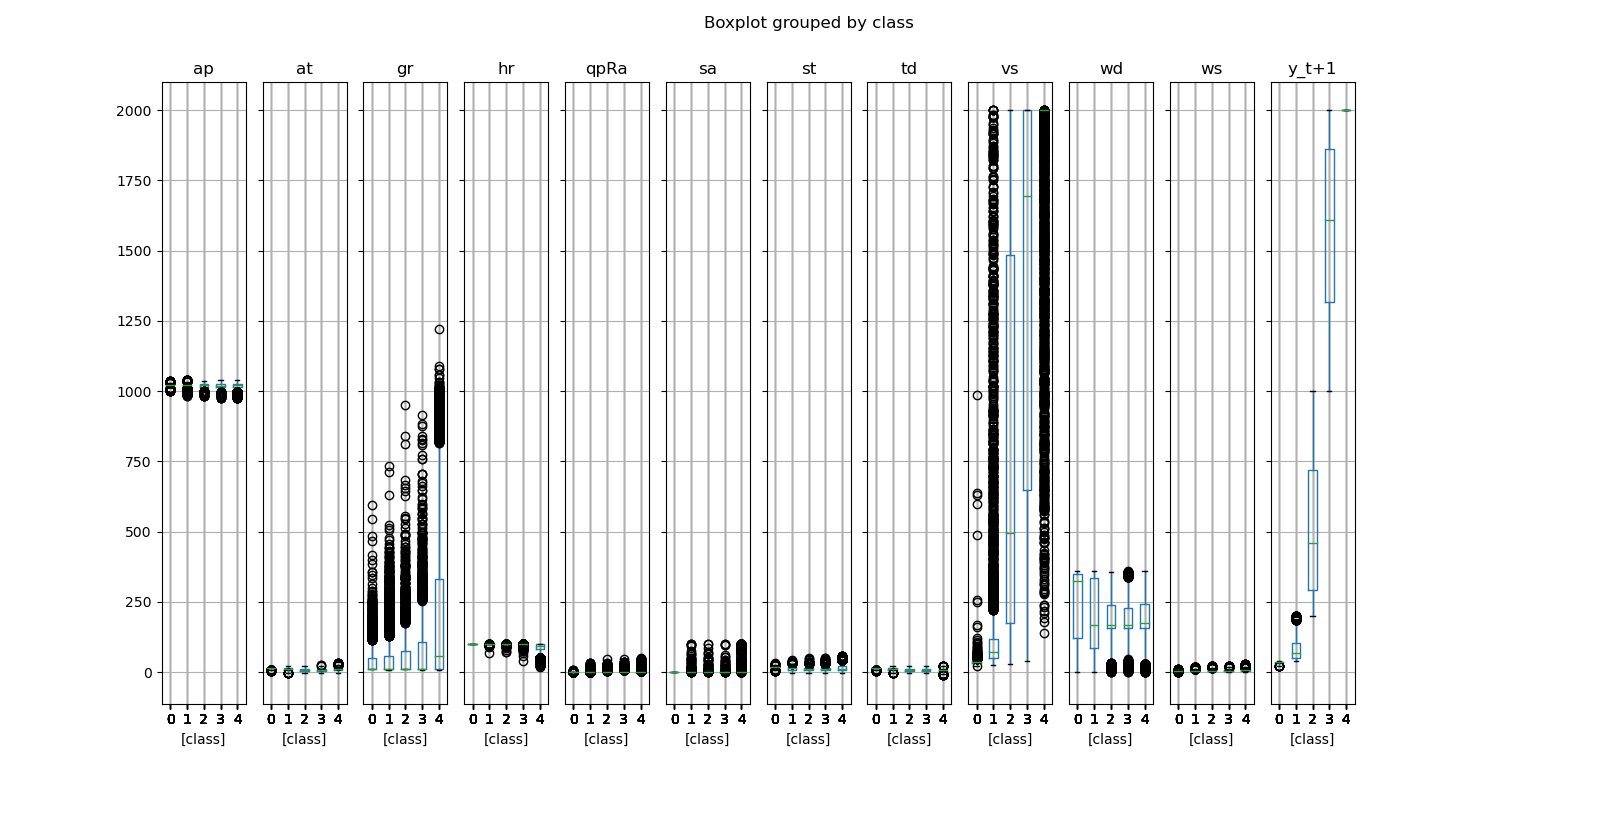

In [13]:
#df.drop(["vs","gr","ap","y_t+1","class"],axis=1).boxplot(layout=(1,df.shape[1]))
%matplotlib notebook

df.boxplot(by="class",layout=(1,df.shape[1]));

__Mostrar estadísticas de distribución de los todos los datos__

In [14]:
desc_stats = ['min', 'mean', 'median', 'max', 'std'] #, 'var']

df.drop("class",1).agg(desc_stats)

,qpRa,sa,vs,hr,at,st,td,gr,ws,wd,ap,y_t+1
min,0.000000,0.00000,20.666667,18.333333,-4.730000,-2.676667,-11.986667,8.833333,0.000000,0.500000,975.000000,20.666667
mean,1.902233,0.57127,1373.274085,92.309261,10.335186,14.304606,8.937537,142.182518,6.035911,193.467890,1019.436445,1373.273494
median,0.100000,0.00000,2000.000000,100.000000,10.195000,12.788333,8.776667,14.333333,5.183333,173.500000,1021.000000,2000.000000
max,49.516667,100.00000,2000.000000,100.000000,31.571667,58.385000,23.091667,1222.500000,27.733333,359.333333,1040.000000,2000.000000
std,4.731819,6.44471,859.513070,13.100890,4.995226,9.529431,4.907642,219.620734,3.990731,103.026868,8.581514,859.512646


<IPython.core.display.Javascript object>


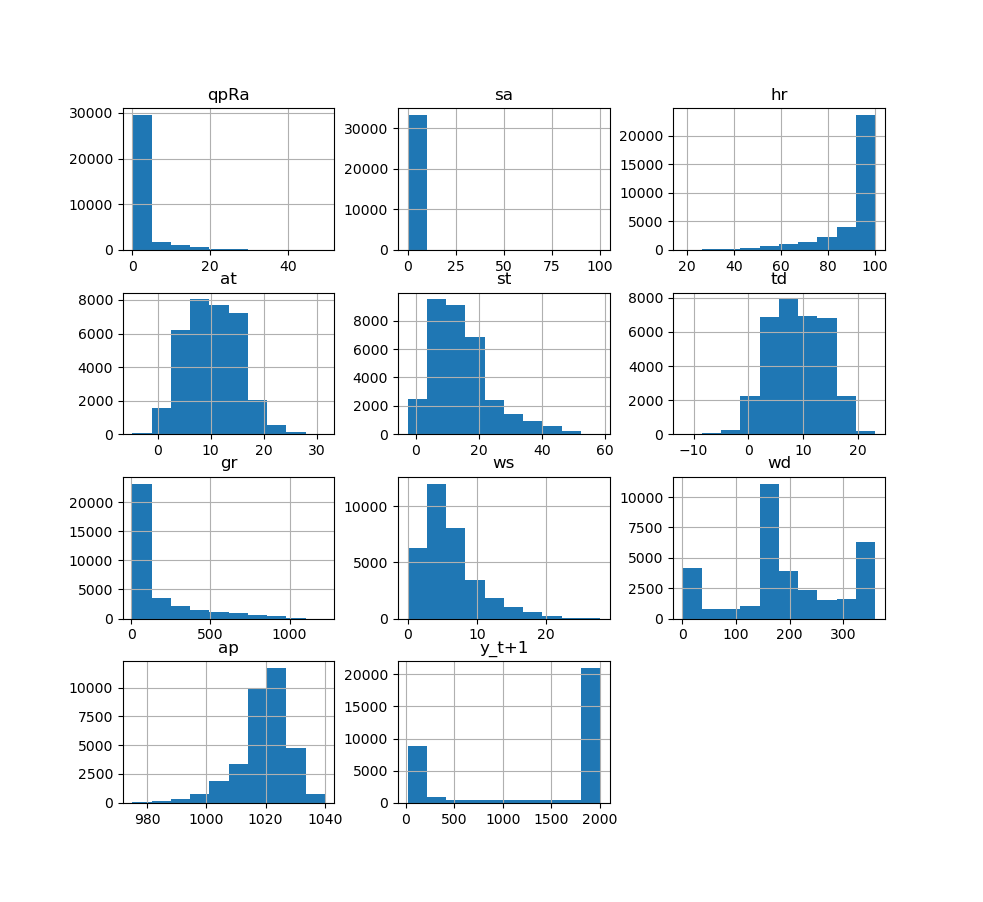

In [15]:
%matplotlib notebook

df.drop(labels=["class", "vs"], axis=1).hist();

__Distribución de las variables en cada clase__

**TODO:** Sacar esta tabla en latex para meterla en el paper

In [16]:
descrpt_dict = {i: df[df["class"] == i].drop(["class","y_t+1"],1).agg(desc_stats).round(4)\
                for i in range(5)}

#pd.set_option('display.precision', 4)

for i in range(5):
    print("Class {}:".format(i))
    display(pd.DataFrame(descrpt_dict[i]))
    print("\n")
    # Save table to latex file
    pd.DataFrame(descrpt_dict[i]).to_latex(f"plots/paper_stuff/desc_stats_table-class_{i}.tex")

Class 0:


,qpRa,sa,vs,hr,at,st,td,gr,ws,wd,ap
min,0.0000,0.0,20.6667,100.0,2.6017,4.5450,2.5950,9.0000,0.0000,0.8333,1001.0000
mean,0.0900,0.0,36.3873,100.0,13.8254,16.3099,13.8169,42.0829,4.9841,239.1802,1021.9295
median,0.0000,0.0,34.1667,100.0,14.4067,16.3733,14.3967,10.0000,5.0333,323.3333,1021.3333
max,6.9000,0.0,987.0000,100.0,19.7650,30.5783,19.7500,594.0000,9.9667,359.3333,1036.0000
std,0.3946,0.0,30.8150,0.0,2.7470,3.5325,2.7465,59.9554,1.5123,133.0046,3.8452




Class 1:


,qpRa,sa,vs,hr,at,st,td,gr,ws,wd,ap
min,0.0000,0.0000,25.1667,68.1667,-4.7300,-2.4933,-4.7467,8.8333,0.0000,0.6667,984.0000
mean,0.7471,0.3120,170.1420,99.9713,10.2805,12.8892,10.2672,47.6424,4.9992,190.2696,1021.6770
median,0.0000,0.0000,69.6667,100.0000,10.9667,13.4833,10.9533,10.0000,4.6000,168.6667,1022.0000
max,32.6000,100.0000,2000.0000,100.0000,22.1333,41.6667,22.1100,731.6667,19.0167,358.8333,1040.0000
std,2.5236,3.9753,307.4923,0.5384,4.4035,5.9224,4.4040,72.0907,2.6503,125.9752,6.6779




Class 2:


,qpRa,sa,vs,hr,at,st,td,gr,ws,wd,ap
min,0.0000,0.000,29.0000,71.5000,-4.4450,-1.8433,-4.5117,9.0000,0.0000,0.5000,981.1667
mean,2.2988,0.569,808.5090,99.7904,8.7249,11.0537,8.6832,59.5361,6.1755,185.0525,1018.4753
median,0.2500,0.000,495.8333,100.0000,8.4392,9.6808,8.4175,10.0000,5.3333,166.0000,1020.0000
max,46.0667,100.000,2000.0000,100.0000,21.7900,48.4183,21.7717,949.0000,23.0333,357.6667,1037.0000
std,4.6984,5.396,711.4822,1.3956,4.5262,6.8423,4.5215,96.2814,4.2442,97.0298,8.4569




Class 3:


,qpRa,sa,vs,hr,at,st,td,gr,ws,wd,ap
min,0.0000,0.0000,38.0000,39.3333,-4.1233,-1.7383,-4.8950,8.8333,0.0000,1.3333,975.0000
mean,2.7871,0.4943,1355.6537,99.3319,8.6402,11.2088,8.5254,78.6752,6.2228,185.1500,1017.6677
median,0.3000,0.0000,1694.4167,100.0000,8.3542,9.7525,8.3050,10.0000,5.3833,168.5000,1019.0000
max,46.7500,100.0000,2000.0000,100.0000,25.9900,50.5017,22.7833,915.5000,22.0167,358.0000,1040.0000
std,5.2966,5.0898,710.9671,2.7779,4.7662,7.6179,4.7579,125.2558,4.2058,95.3944,9.3306




Class 4:


,qpRa,sa,vs,hr,at,st,td,gr,ws,wd,ap
min,0.0000,0.0000,139.6667,18.3333,-4.3217,-2.6767,-11.9867,8.8333,0.0000,0.6667,975.0000
mean,2.3267,0.7306,1968.0478,87.3575,10.2984,15.2150,8.0040,200.0556,6.4427,190.6589,1018.7681
median,0.1000,0.0000,2000.0000,92.3333,9.7650,12.2517,7.5650,56.3333,5.4667,174.1667,1020.0000
max,49.5167,100.0000,2000.0000,100.0000,31.5717,58.3850,23.0917,1222.5000,27.7333,358.8333,1039.6667
std,5.3154,7.5950,173.0258,14.8873,5.2360,11.0456,4.8723,257.8985,4.3870,90.3967,9.2285


## EDA de y

__Valores de la serie temporal de visibilidad__

No se llega a distinguir nada

In [17]:
%matplotlib notebook

sns.lineplot(data=df["vs"]);

<IPython.core.display.Javascript object>

__Ver distribución de las visibilidad__

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


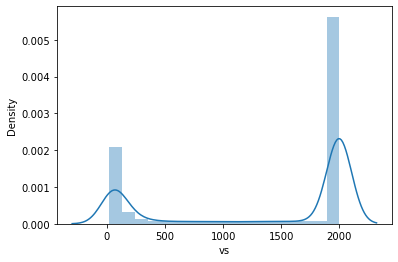

In [18]:
%matplotlib inline

#Ver la distribución de la visibilidad
sns.distplot(df["vs"]);

## EDA de Clases

__Ver distribución de las clases__

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


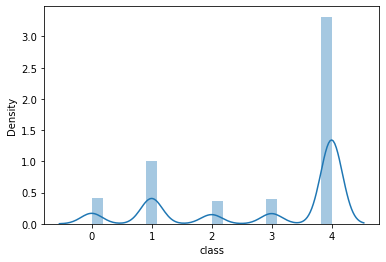

In [19]:
#Ver la distribución por clases
sns.distplot(df["class"]);

Está muy desbalanceado. De la clase 4, son un 60% de los datos.

In [20]:
tot = classes.shape[0]

{i: sum(classes == i)*100/tot for i in range(5)}

{0: 7.53181723346547,
 1: 18.23194539656046,
 2: 6.598909123424041,
 3: 7.344043396620071,
 4: 60.293284849929954}

In [21]:
{i: sum(classes == i) for i in range(5)}

{0: 2527, 1: 6117, 2: 2214, 3: 2464, 4: 20229}

-------------------

La aplicación de métodos para el desbalanceo no se hace aquí, si no en el script ``src/Data/data_wrangling.py``. Aquí se muestra información sobre la distribución de las clases despues de haber aplicado los métodos.

------------------------

### Original data

In [22]:
#Cargar el fichero con los datos originales
plain_df = pd.read_csv(NEW_DATA_PATH+"HoldOut/Train.csv")

#Ver la distribución de clases
{i: sum(plain_df["class"] == i)*100/len(plain_df["class"]) for i in range(5)}

{0: 7.533532041728763,
 1: 18.230253353204173,
 2: 6.598360655737705,
 3: 7.343517138599106,
 4: 60.29433681073025}

In [23]:
{i: sum(plain_df["class"] == i) for i in range(5)}

{0: 2022, 1: 4893, 2: 1771, 3: 1971, 4: 16183}

<AxesSubplot:>

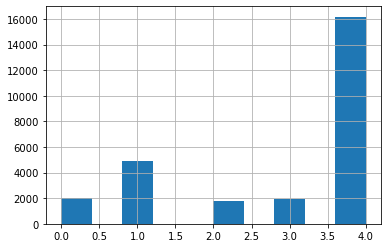

In [24]:
%matplotlib inline
plain_df["class"].hist()

### Undersampling

__Random Undersampling__
Conservar el ratio de la segunda clase mayoritaria a la mayoritaria para el undersampling aleatorio de la mayoritaria.

In [25]:
#Cargar el fichero con RUS aplicado
rus_df = pd.read_csv(NEW_DATA_PATH+"HoldOut/Train_RUS.csv")

#Ver la distribución de clases
{i: sum(rus_df["class"] == i)*100/len(rus_df["class"]) for i in range(5)}

{0: 8.870755461963675,
 1: 21.46617530929192,
 2: 7.769588488198648,
 3: 8.647012371676757,
 4: 53.246468368869}

In [26]:
{i: sum(rus_df["class"] == i) for i in range(5)}

{0: 2022, 1: 4893, 2: 1771, 3: 1971, 4: 12137}

Ver correlaciones y datos de distribución por variables

In [27]:
rus_df.drop("class",1).agg(desc_stats)

,qpRa,sa,vs,hr,at,st,td,gr,ws,wd,ap
min,0.000000,0.00000,20.666667,18.333333,-4.730000,-2.676667,-11.986667,8.833333,0.000000,0.666667,975.000000
mean,1.818626,0.53188,1267.405721,93.162704,10.357495,14.148724,9.113107,132.072183,5.951365,193.991496,1019.613963
median,0.100000,0.00000,2000.000000,100.000000,10.326667,12.855833,9.030833,12.333333,5.150000,173.333333,1021.000000
max,47.966667,100.00000,2000.000000,100.000000,31.141667,58.385000,23.091667,1222.500000,27.733333,359.333333,1040.000000
std,4.604892,6.13820,889.163265,12.607873,4.941179,9.221534,4.888604,210.655709,3.907961,105.324172,8.418172


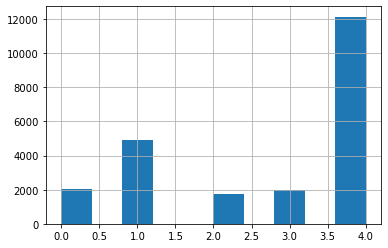

In [28]:
%matplotlib inline
rus_df["class"].hist();

__Condensed Nearest Neighbour__

In [29]:
#Cargar el fichero con CNN aplicado
cnn_df = pd.read_csv(NEW_DATA_PATH+"HoldOut/Train_CNN.csv")

#Ver la distribución de clases
{i: sum(cnn_df["class"] == i)*100/len(cnn_df["class"]) for i in range(5)}

{0: 16.606438896189225,
 1: 40.18561103810775,
 2: 14.545006570302235,
 3: 16.187582128777922,
 4: 12.475361366622865}

In [30]:
{i: sum(cnn_df["class"] == i) for i in range(5)}

{0: 2022, 1: 4893, 2: 1771, 3: 1971, 4: 1519}

Ver correlaciones y datos de distribución por variables

In [31]:
cnn_df.drop("class",1).agg(desc_stats)

,qpRa,sa,vs,hr,at,st,td,gr,ws,wd,ap
min,0.000000,0.000000,20.666667,39.333333,-4.730000,-2.493333,-5.185000,8.833333,0.000000,0.666667,975.000000
mean,1.418924,0.328214,633.061432,99.460222,10.225011,12.755402,10.128437,58.448601,5.474492,197.574203,1020.200381
median,0.083333,0.000000,122.333333,100.000000,10.720000,12.976667,10.611667,10.000000,4.933333,172.833333,1021.000000
max,47.300000,100.000000,2000.000000,100.000000,25.990000,49.596667,22.763333,1008.666667,26.566667,359.333333,1040.000000
std,3.848223,4.085838,783.226660,2.892474,4.624793,6.528974,4.640157,96.091742,3.320181,117.068178,7.593134


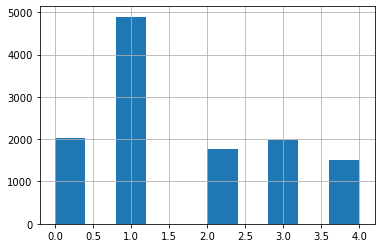

In [32]:
%matplotlib inline
cnn_df["class"].hist();

__Neighbourhood Cleaning Rule__

In [33]:
#Cargar el fichero con NCR aplicado
ncr_df = pd.read_csv(NEW_DATA_PATH+"HoldOut/Train_NCR.csv")

#Ver la distribución de clases
{i: sum(ncr_df["class"] == i)*100/len(ncr_df["class"]) for i in range(5)}

{0: 7.76855693868142,
 1: 18.7989857076994,
 2: 6.8042108498540035,
 3: 7.572614107883817,
 4: 59.05563239588136}

In [34]:
{i: sum(ncr_df["class"] == i) for i in range(5)}

{0: 2022, 1: 4893, 2: 1771, 3: 1971, 4: 15371}

Ver correlaciones y datos de distribución por variables

In [35]:
ncr_df.drop("class",1).agg(desc_stats)

,qpRa,sa,vs,hr,at,st,td,gr,ws,wd,ap
min,0.000000,0.000000,20.666667,18.333333,-4.730000,-2.676667,-11.986667,8.833333,0.000000,0.666667,975.000000
mean,1.880466,0.542570,1368.837841,92.100866,10.400851,14.421243,8.965311,144.636033,6.036919,193.853971,1019.500512
median,0.100000,0.000000,2000.000000,100.000000,10.280833,12.888333,8.815000,14.833333,5.200000,174.000000,1021.000000
max,49.516667,100.000000,2000.000000,100.000000,31.571667,58.385000,23.091667,1222.500000,27.733333,359.333333,1040.000000
std,4.689951,6.274351,867.847897,13.224025,4.988349,9.583866,4.914033,221.933028,3.992088,103.313031,8.573047


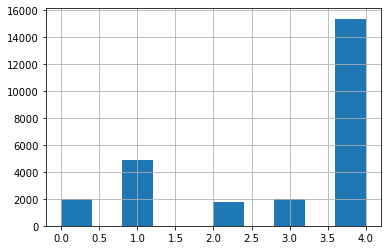

In [36]:
%matplotlib inline
ncr_df["class"].hist();

__Tomek Links__

In [37]:
#Cargar el fichero con TL aplicado
tl_df = pd.read_csv(NEW_DATA_PATH+"HoldOut/Train_TL.csv")

#Ver la distribución de clases
{i: sum(tl_df["class"] == i)*100/len(tl_df["class"]) for i in range(5)}

{0: 7.720504009163803,
 1: 18.68270332187858,
 2: 6.762122947689958,
 3: 7.525773195876289,
 4: 59.30889652539137}

In [38]:
{i: sum(tl_df["class"] == i) for i in range(5)}

{0: 2022, 1: 4893, 2: 1771, 3: 1971, 4: 15533}

Ver correlaciones y datos de distribución por variables

In [39]:
tl_df.drop("class",1).agg(desc_stats)

,qpRa,sa,vs,hr,at,st,td,gr,ws,wd,ap
min,0.000000,0.000000,20.666667,18.333333,-4.730000,-2.676667,-11.986667,8.833333,0.000000,0.666667,975.000000
mean,1.893779,0.542440,1365.334982,92.162600,10.372170,14.371181,8.947657,143.755581,6.025900,193.817672,1019.484772
median,0.100000,0.000000,2000.000000,100.000000,10.232500,12.844167,8.785000,14.666667,5.183333,173.833333,1021.000000
max,49.516667,100.000000,2000.000000,100.000000,31.571667,58.385000,23.091667,1222.500000,27.733333,359.333333,1040.000000
std,4.709769,6.242526,865.331877,13.195108,4.991707,9.562103,4.912067,221.097801,3.982523,103.270715,8.581939


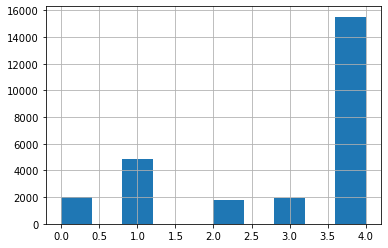

In [40]:
%matplotlib inline
tl_df["class"].hist();

__Undersampling comparison__

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


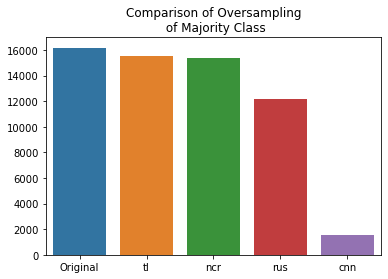

In [41]:
comp = pd.Series({"Original": sum(plain_df["class"] == 4),
"tl": sum(tl_df["class"]==4),
"ncr": sum(ncr_df["class"]==4),
"rus": sum(rus_df["class"]==4),
"cnn": sum(cnn_df["class"]==4)})

plt.title("Comparison of Oversampling\n of Majority Class")
sns.barplot(comp.index, comp.values);

__Undersampling & Oversampling comparison__

In [42]:
smt_df = pd.read_csv(NEW_DATA_PATH+"HoldOut/Train_SMT.csv")
rus_smt_df = pd.read_csv(NEW_DATA_PATH+"HoldOut/Train_RUS_SMT.csv")
ncr_smt_df = pd.read_csv(NEW_DATA_PATH+"HoldOut/Train_NCR_SMT.csv")
tl_smt_df = pd.read_csv(NEW_DATA_PATH+"HoldOut/Train_TL_SMT.csv")

__Only SMOTE__

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


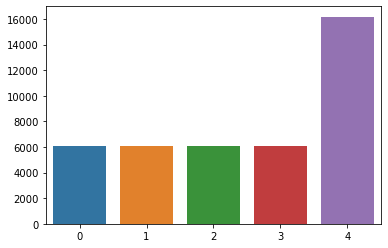

In [43]:
smt_dist = smt_df["class"].value_counts().to_dict()
sns.barplot(list(smt_dist.keys()), list(smt_dist.values()));

__RUS & SMOTE__

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


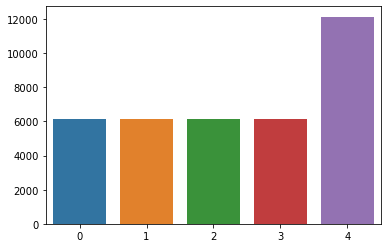

In [44]:
rus_smt_dist = rus_smt_df["class"].value_counts().to_dict()
sns.barplot(list(rus_smt_dist.keys()), list(rus_smt_dist.values()));

__NCR & SMOTE__

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


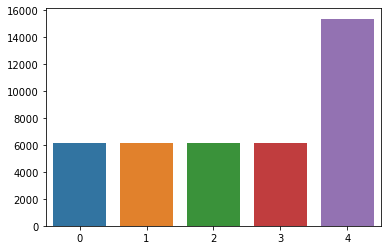

In [45]:
ncr_smt_dist = ncr_smt_df["class"].value_counts().to_dict()
sns.barplot(list(ncr_smt_dist.keys()), list(ncr_smt_dist.values()));

__TL & SMOTE__

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


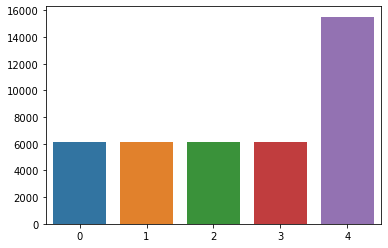

In [46]:
tl_smt_dist = tl_smt_df["class"].value_counts().to_dict()
sns.barplot(list(tl_smt_dist.keys()), list(tl_smt_dist.values()));

### Oversampling

__SMOTE__

In [47]:
#Cargar el fichero con SMT aplicado
#smt_df = pd.read_csv(NEW_DATA_PATH+"HoldOut/Train_SMT.csv")

#Ver la distribución de clases
#{i: sum(smt_df["class"] == i)*100/len(smt_df["class"]) for i in range(5)}

In [48]:
#{i: sum(smt_df["class"] == i) for i in range(5)}

Ver correlaciones y datos de distribución por variables

In [49]:
#smt_df.drop("class",1).agg(desc_stats)

In [50]:
%matplotlib notebook
#smt_df.hist();

### References

1. [SMOGN: a Pre-processing Approach for Imbalanced Regression](http://proceedings.mlr.press/v74/branco17a/branco17a.pdf)
2. [SMOTE for Regression](http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=23D61BE14B6C14E9D33DE8CE287A3C4E?doi=10.1.1.432.7617&rep=rep1&type=pdf)
3. [Condensed Nearest-Neighbor](https://pdfs.semanticscholar.org/090a/6772a1d69f07bfe7e89f99934294a0dac1b9.pdf)
4. [Neighborhood  Cleaning  Rule](ftp://nozdr.ru/biblio/kolxoz/Cs/CsLn/A/Artificial%20Intelligence%20Medicine,%208%20conf.,%20AIME%202001(LNCS2101,%20Springer,%202001)(ISBN%203540422943)(483s)_CsLn_.pdf#page=77)
5. 